#Why Spaghetti Does Not Break in Half

Reference
---
- Basile Audoly and Sébastien  Neukirch, Fragmentation of Rods by Cascading Cracks: Why Spaghetti Does Not Break in Half, PHYSICAL REVIEW LETTERS, 26 AUGUST 2005 

> **Abstract**
> 
When thin brittle rods such as dry spaghetti pasta are bent beyond their limit curvature, they often break into more than two pieces, typically three or four. With the aim of understanding these multiple breakings, we study the dynamics of a bent rod that is suddenly released at one end. We find that the sudden relaxation of the curvature at this end leads to a burst of flexural waves, whose dynamics are described by a self-similar solution with no adjustable parameters. These flexural waves locally increase the curvature in the rod, and we argue that this counterintuitive mechanism is responsible for the fragmentation of brittle rods under bending. A simple experiment supporting the claim is presented.



<img src="imgs/spaghetti.png">

Consider a rod that is held at both ends and bent quasistatically with an increasing, uniform curvature. It breaks at time $t=0$ when its curvature $\kappa_􏰀0$ reaches its limit value $\kappa^*$ 􏰀􏰇: a dynamic crack crosses the weakest section and breaks the rod into two halves. As the rod was initially bent with uniform curvature, the location of this first failure point is that of the strongest defect. We do not further discuss this initial breaking event, but instead focus on the subsequent dynamics of either half of the rod, for $t > 0$, and show that this dynamics generically leads to new breaking events at later times.

Similar to the model, consider the model, described in Figure above:

> In the model problem, the rod is initially uniformly bent and at rest. 
This is achieved by clamping one end and applying a moment $M_0$ at the other end: $M_0$ plays the role of the internal moment transmitted across the section that is about to fail. At time $t=0$, this end is suddenly released as the applied moment $M_0$ is removed instantaneously. The rod no longer is in equilibrium, and we study its subsequent dynamics. 



Kirchhoff Equations
---

$$ L^4 \frac{\partial^4\kappa(s,t)}{\partial s^4}+T^2\frac{\partial^2\kappa(s,t)}{\partial t^2}=0 $$


where $s$ is the arc length and
- Time $T=L^2/\gamma$, where $\gamma=\sqrt{EI/\rho A}$
- $E$ the Young’s modulus, known as the tensile modulus or elastic modulus, is a measure of the stiffness of an elastic material and is a quantity used to characterize materials (about 1GPa for Pasta).
- $\rho$ the mass density, 
- area $A=4\pi r^2$ where $r$ the radius of spaghetti, and 
- $I$: the principal moment of inertia of the cross section.

Result 
---

$$\kappa(s,t)=2\kappa_0 S\left( \frac{1}{\sqrt{2\pi}}\frac{s}{\sqrt{\gamma t}}  \right)$$

where $S$ is the Fresnel integral, defined as follows:
$$ S(x)=\int_0^x\sin\left( \frac{\pi}{2}y^2 \right)d y$$

In [1]:
%matplotlib inline

# import Python's library available for computing functions and related properties
import numpy as np
from numpy import sin,cos,exp,pi,sqrt,arange,meshgrid
# import the libarary for plotting

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm,animation
from JSAnimation import IPython_display

#from scipy.integrate import trapz 
#from matplotlib.colors import LinearSegmentedColormap, Normalize

In [2]:
r=0.521;#0.738;0.82;
L=0.24
k0=1./L
t=np.linspace(0,0.02,101)
x=np.linspace(0,1,101)


The function, $S(x)$ introduced above, is typital spectial function which numneric scheme had implemented in subpackage od SciPy, *scipy.special*.

In [3]:
from scipy.special import fresnel

In [5]:
fresnel(100000)[0]


0.49999681690113817

In [6]:
def kappa(x,t,gamma=r):
    """
    input position,time (x,t) variables;
    $gamma=r if not set
    
    To prevant division overflow, value of time adds a small quantity in advanced  
    """
    y=1*x*L/sqrt(gamma*(t+1e-6))
    return 2*k0*fresnel(y)[0]

Note
---

To get the best observation, suitable setup the view angle of 3D output by the following: 

```
view_init(elev=None, azim=None)

Set the elevation and azimuth of the axes.

```

In [7]:
def plot3d(x,t,f):  
  fig = plt.figure(figsize=(12,8))
  ax = fig.gca(projection='3d')
  ax.view_init(50,20)  
  ax.set_xlabel("$s/L$",size=16)
  ax.set_ylabel("$t/T$",size=16)  
  ax.set_zlim3d(.0, 1.4);
  ax.set_xlim3d(.0, 1);
  ax.set_ylim3d(.0, 0.02);

  #ax.scatter3D(np.ravel(PX),PT,np.ravel(PF),alpha=0.3,color='blue')  

  #ax.plot_surface((PX),PT,(PF),alpha=0.6)
  surf = ax.plot_surface(X, T, f, cmap=cm.OrRd,alpha=0.6)

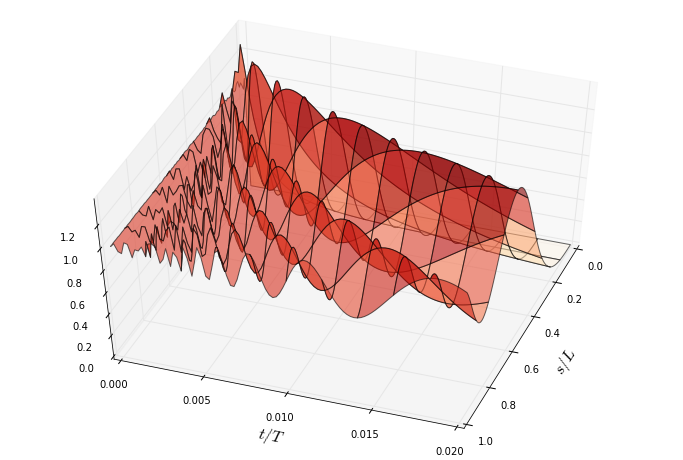

In [8]:
X, T = meshgrid(x, t)

Z = kappa(X,T)
plot3d(X,T,Z/k0)

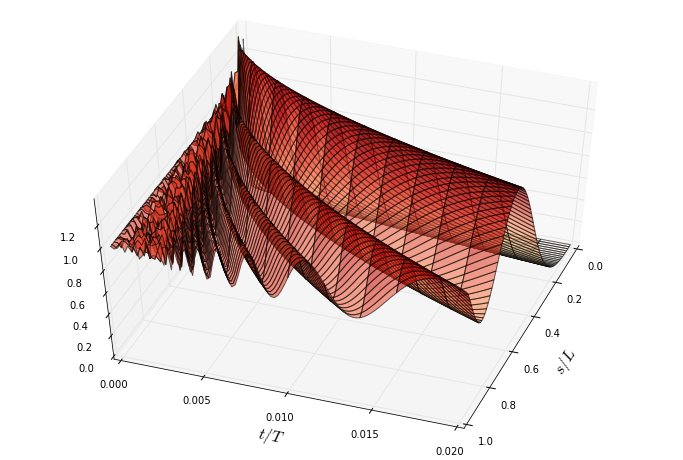

In [9]:
X,T = np.ogrid[0:1:800j,0:0.02:100j]
plot3d(X/L,T,kappa(X,T)/k0)


How to Get its informations?
---

It might be more clear if we add the cut plane at certain time. 

In [10]:
t0=0.015
px=np.linspace(0,1,11);
pt=t0*np.ones(11);
pf=np.linspace(0,1.6,11);

PX,PF=np.meshgrid(px,pf)
PT=t0*np.ones(11*11);

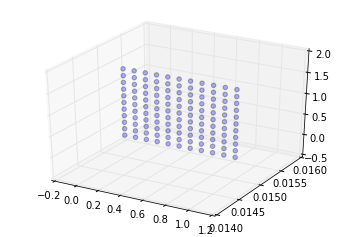

In [11]:
fig=plt.figure()
ax = fig.gca(projection='3d')
#ax = Axes3D(fig)
# scatter3D requires a 1D array for x, y, and z
# ravel() converts the 100x100 array into a 1x10000 array
ax.scatter3D(np.ravel(PX),PT,np.ravel(PF),alpha=0.3)

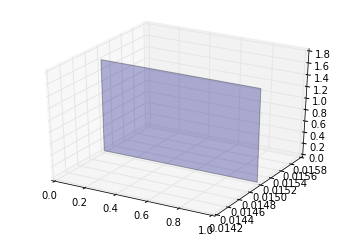

In [12]:
fig=plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig)
# scatter3D requires a 1D array for x, y, and z
# ravel() converts the 100x100 array into a 1x10000 array
PT=0*PX

ax1.plot_surface(PX,PT+0.015,PF,alpha=0.3)

In [13]:
def plot3d1(x,t,f):  
  fig = plt.figure(figsize=(12,8))
  ax = fig.gca(projection='3d')
   
  ax.set_xlabel("$s/L$",size=16)
  ax.set_ylabel("$t/T$",size=16)  
  ax.set_zlim3d(.0, 1.4);
  ax.set_xlim3d(.0, 1);
  ax.set_ylim3d(.0, 0.02);
  
  ax.plot_surface((PX),PT+0.015,(PF),alpha=0.9)
  surf = ax.plot_surface(X, T, f, cmap=cm.OrRd,alpha=1.0)
  ax.view_init(85,85) 

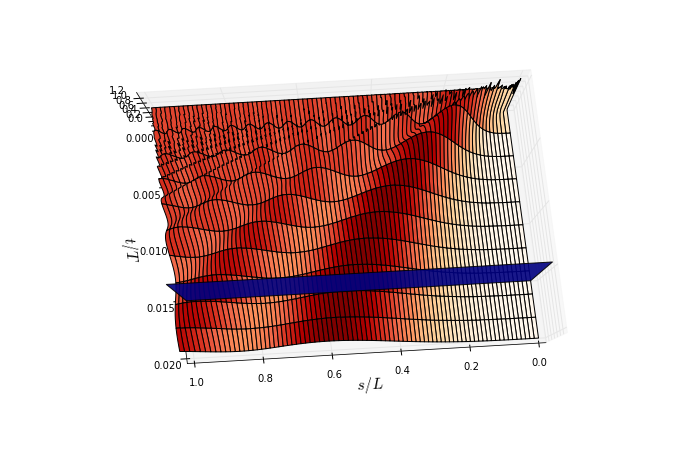

In [14]:
X,T = np.ogrid[0:1:800j,0:0.02:100j]
plot3d1(X/L,T,kappa(X,T)/k0)

The better
---

the better we can make the interscetion picture of cut plane and the surface...

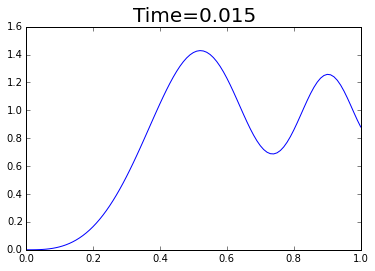

In [15]:
t0=0.015
plt.title('Time=%4.3f' %t0, size=20)
plt.xlim(0,1)
plt.ylim(0,1.6)

plt.plot(x,kappa(x,t0)/k0)


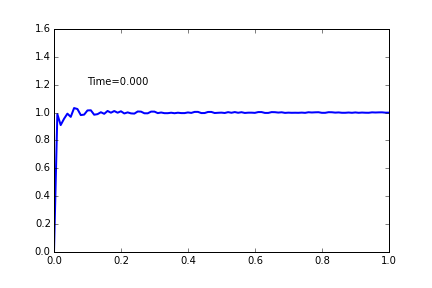
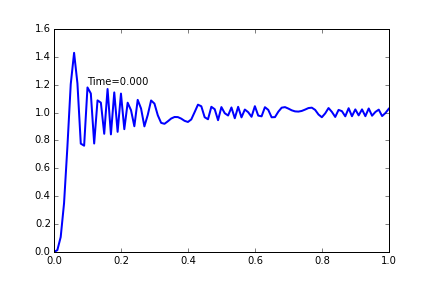
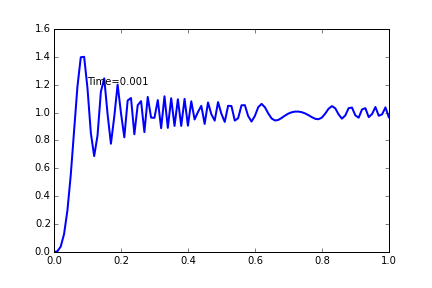
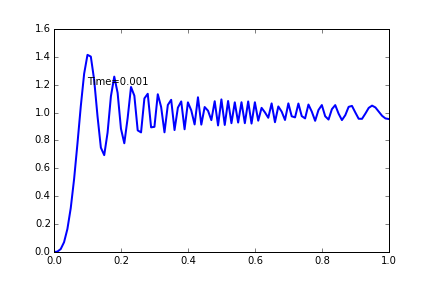
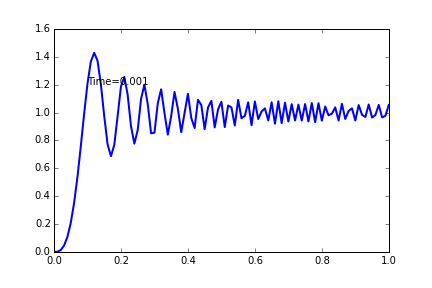
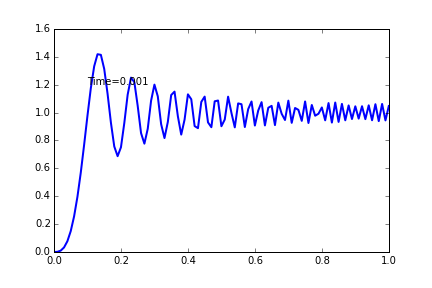
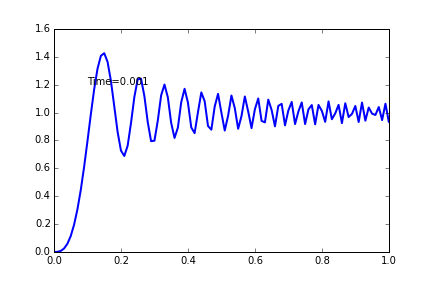
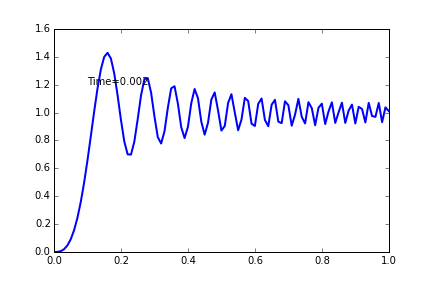
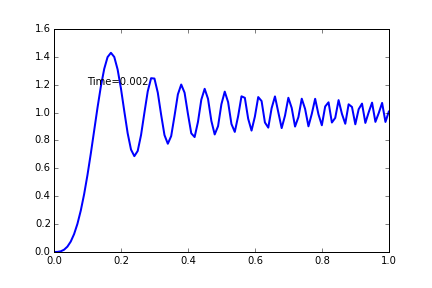
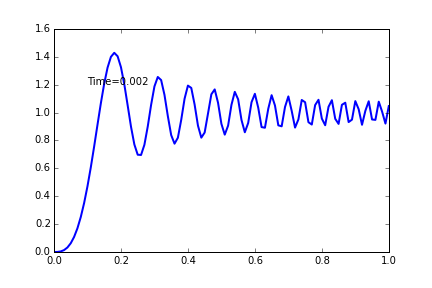
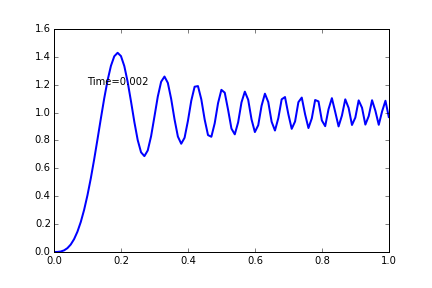
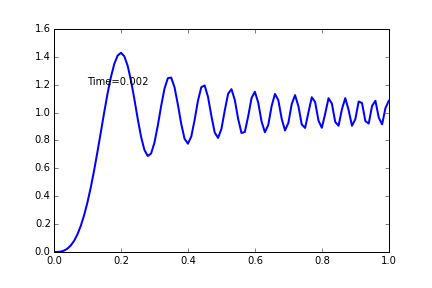
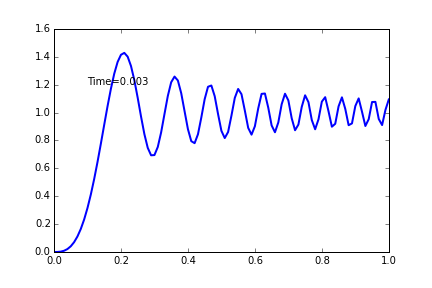
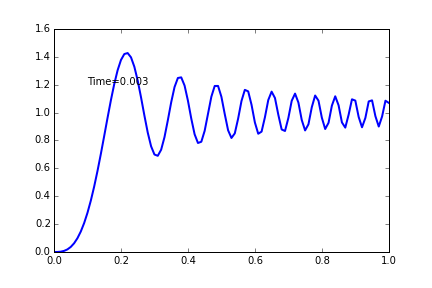
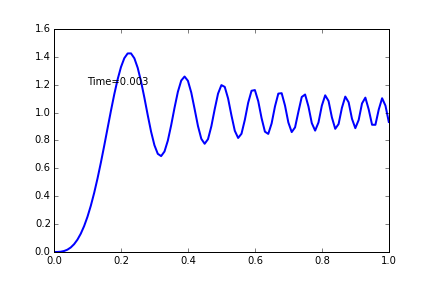
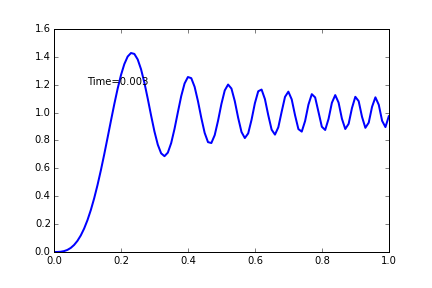
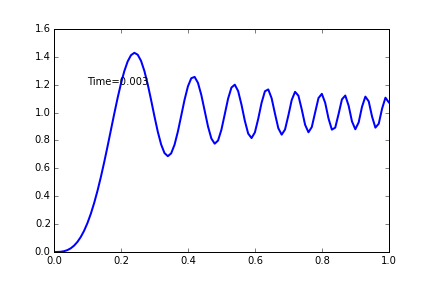
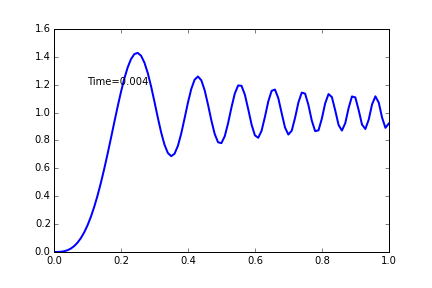
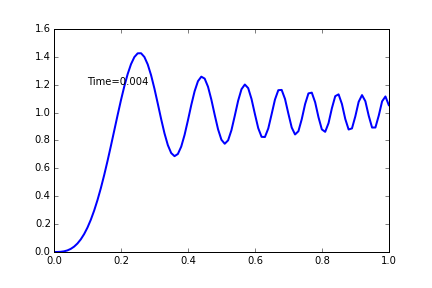
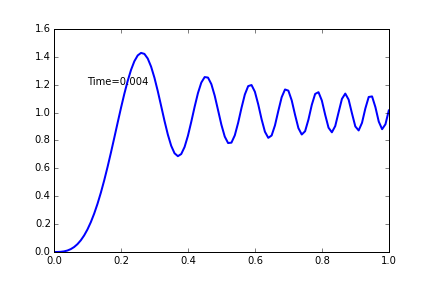
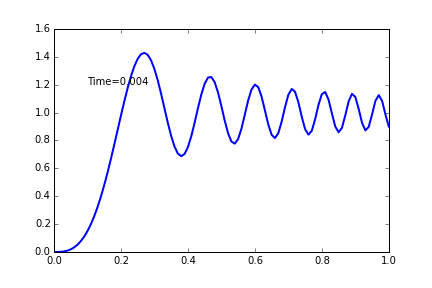
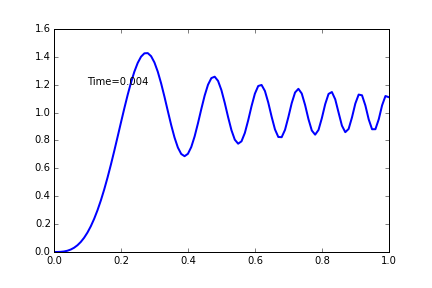
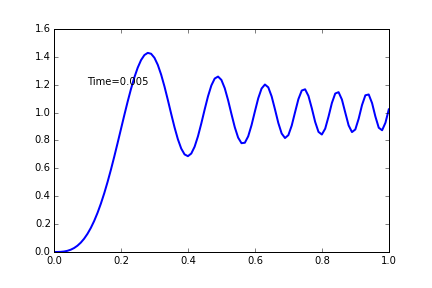
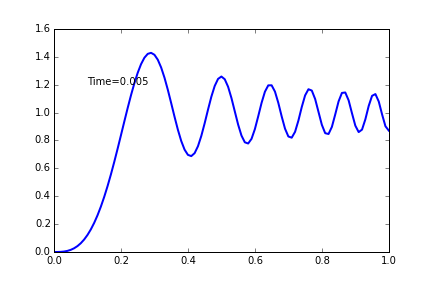
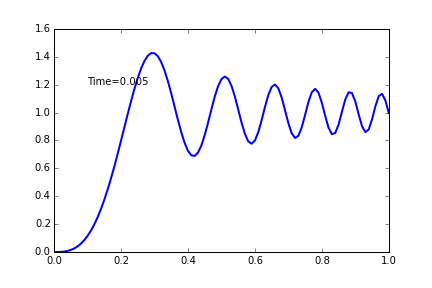
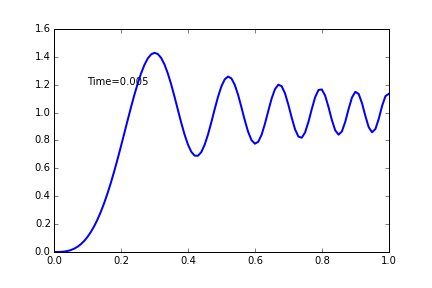
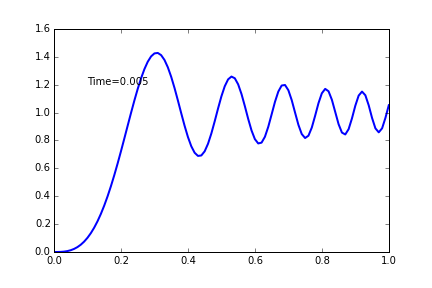
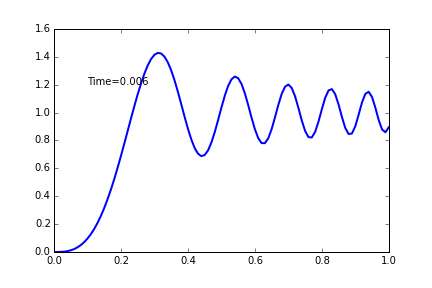
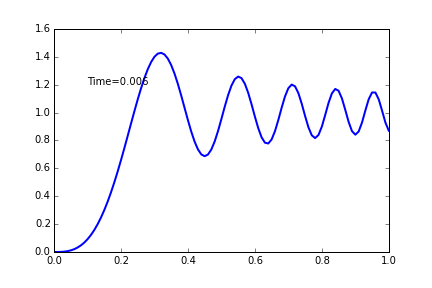
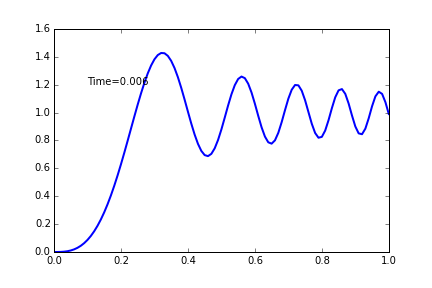
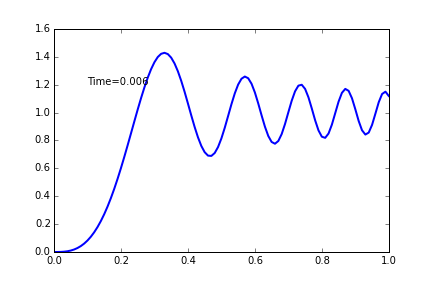
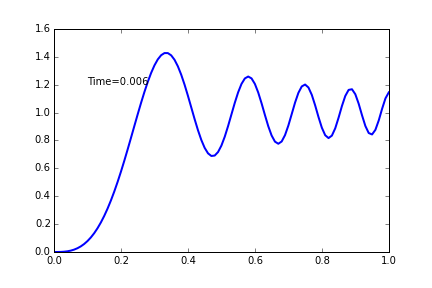
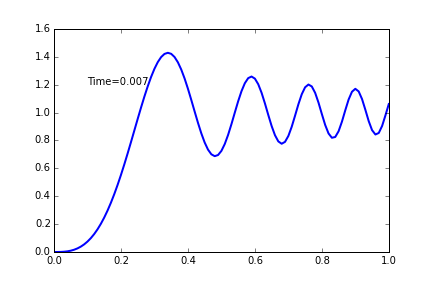
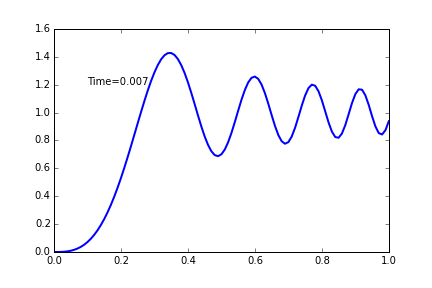
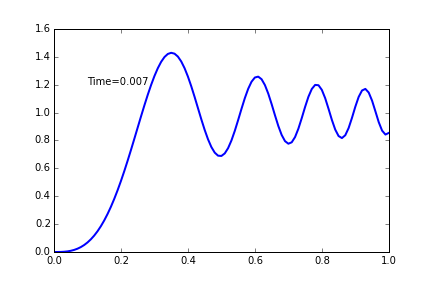
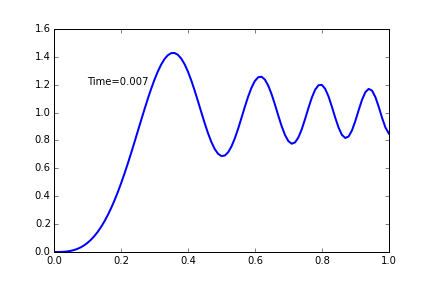
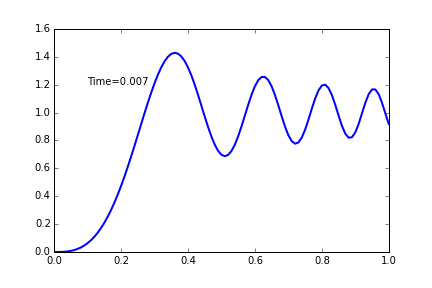
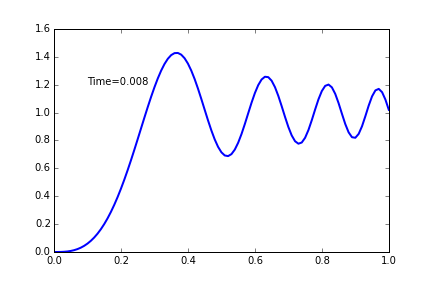
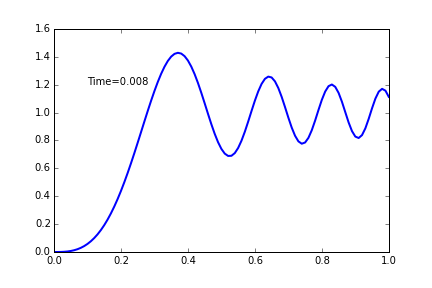
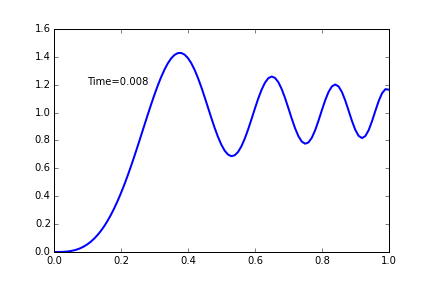
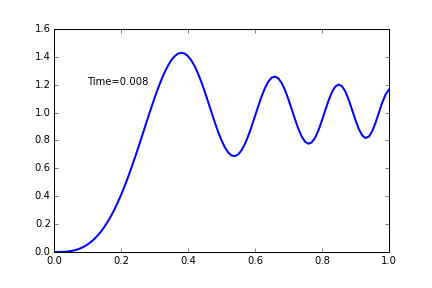
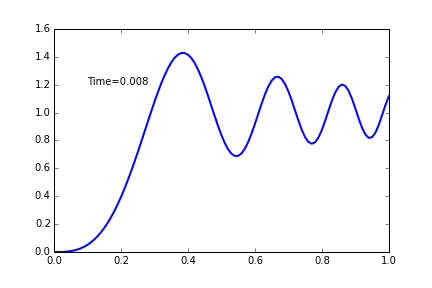
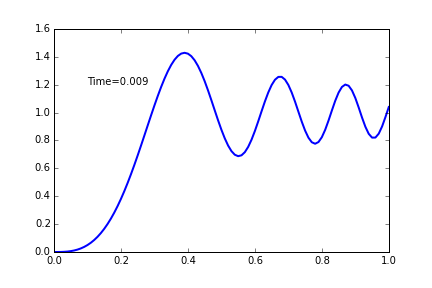
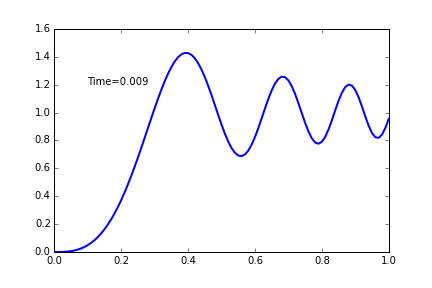
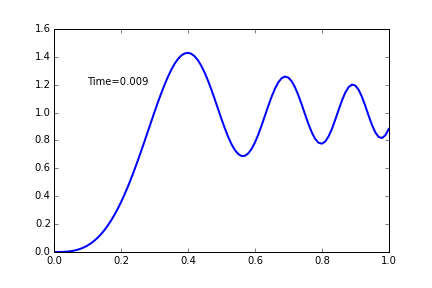
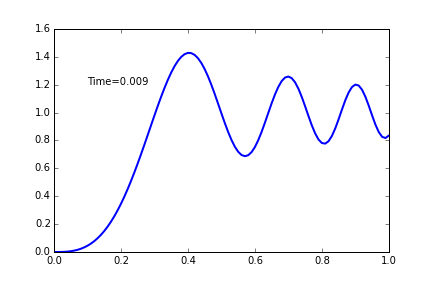
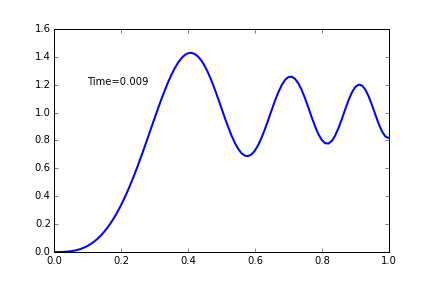
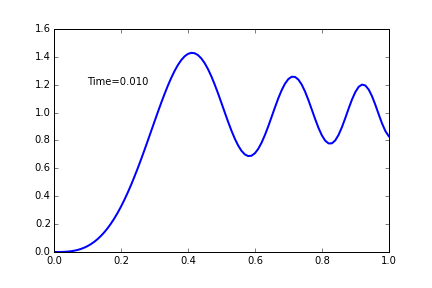
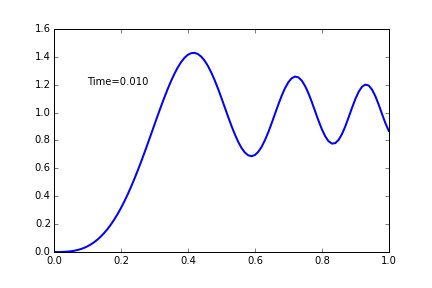
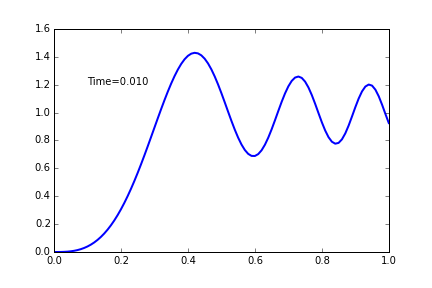
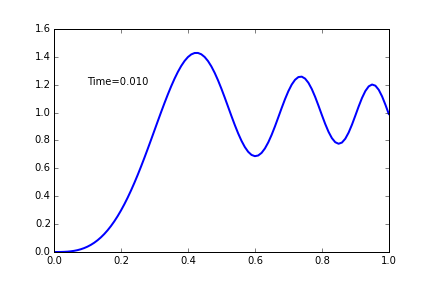
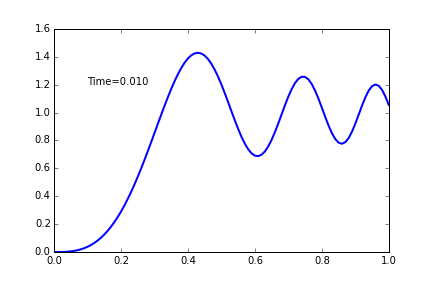
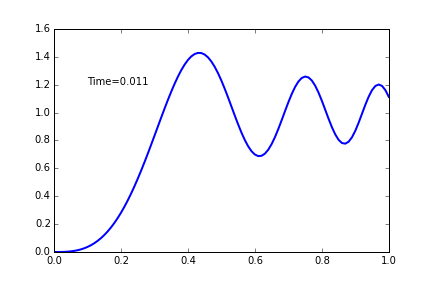
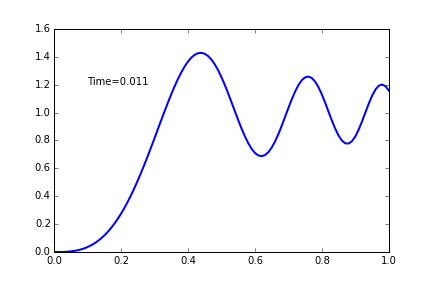
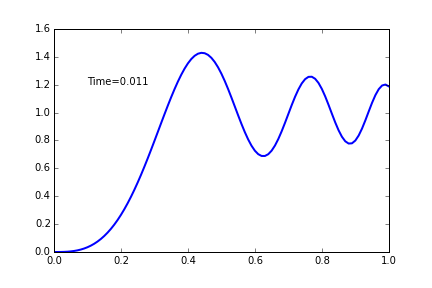
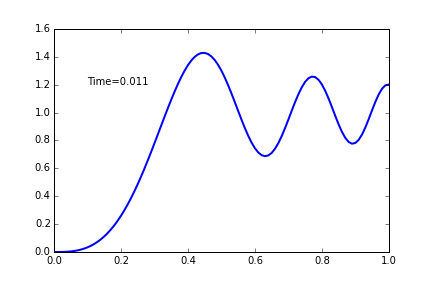
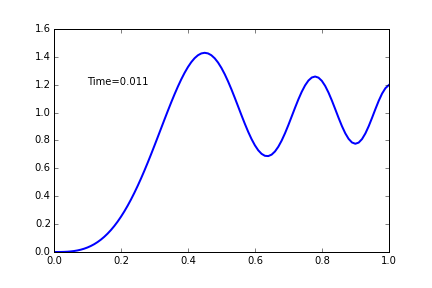
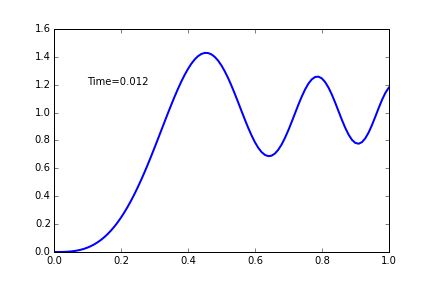
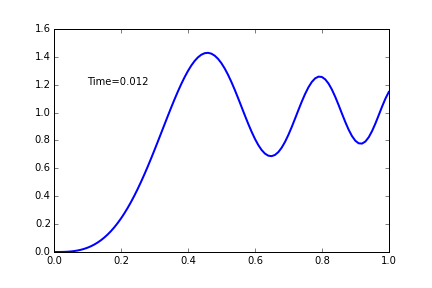
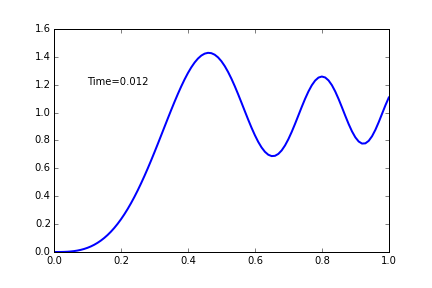
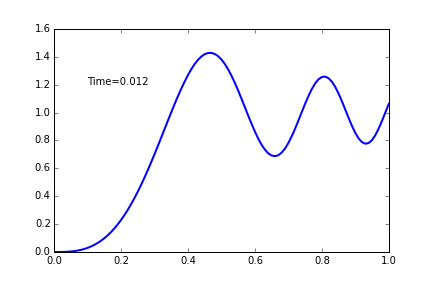
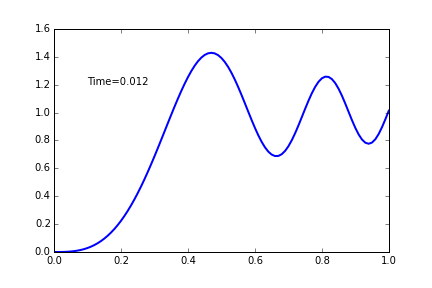
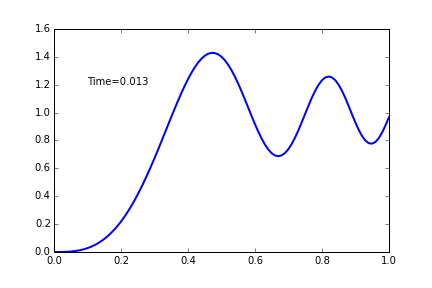
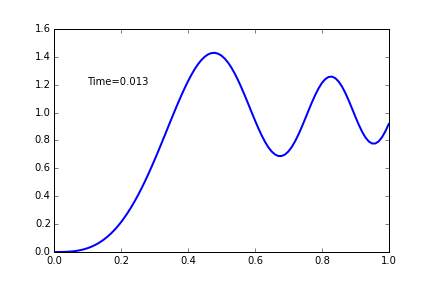
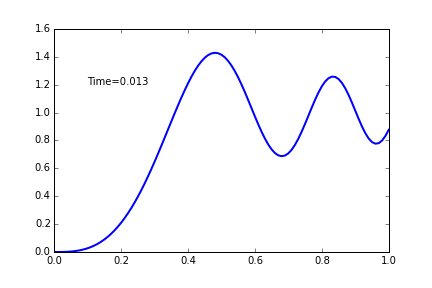
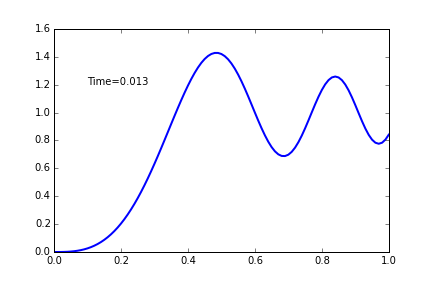
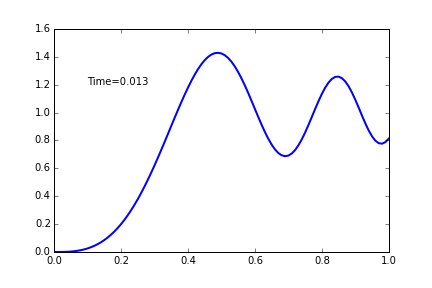
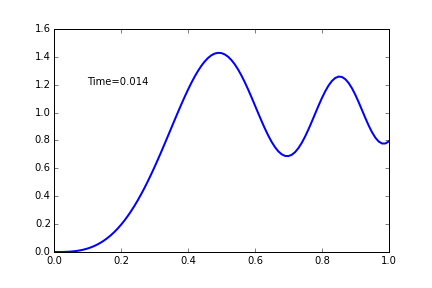
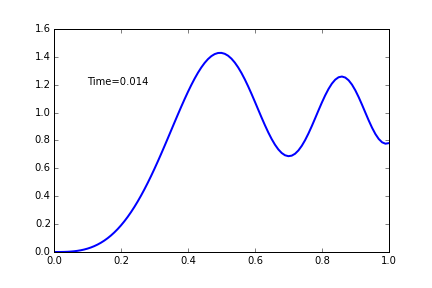
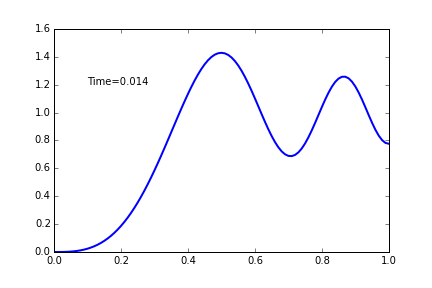
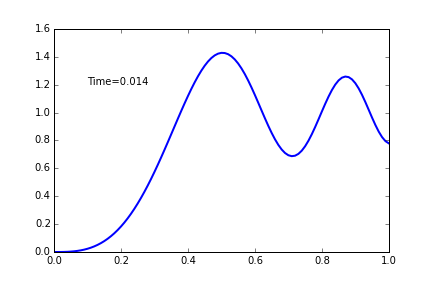
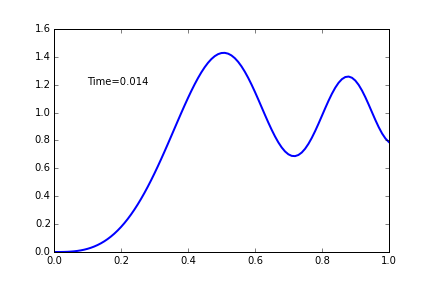
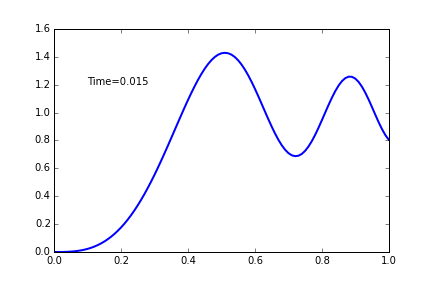
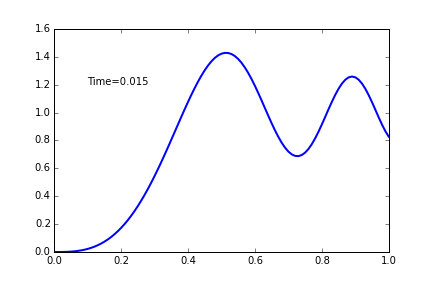
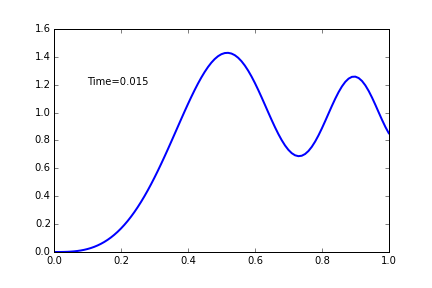
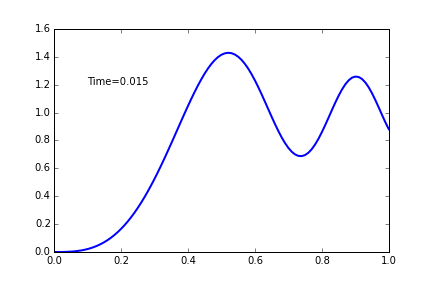
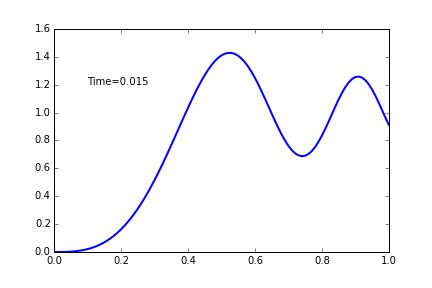
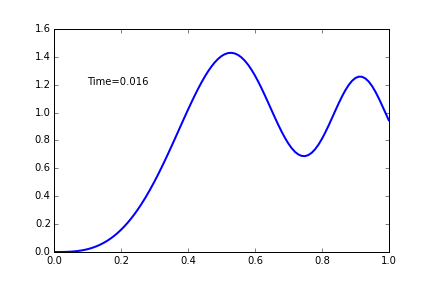
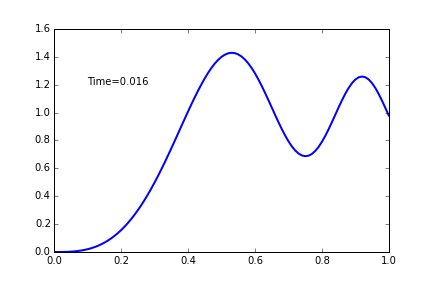
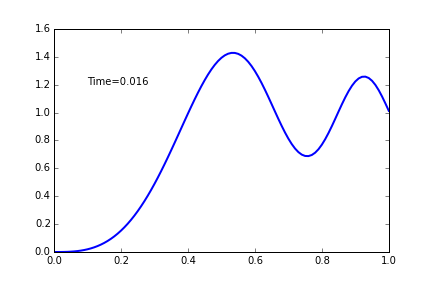
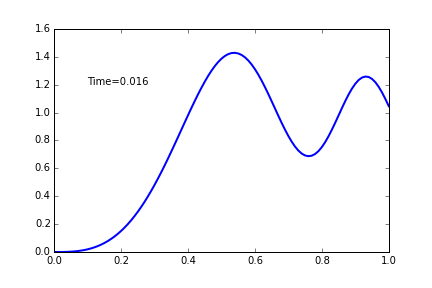
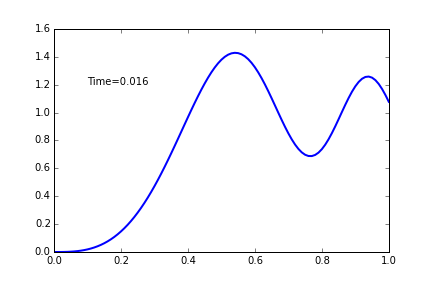
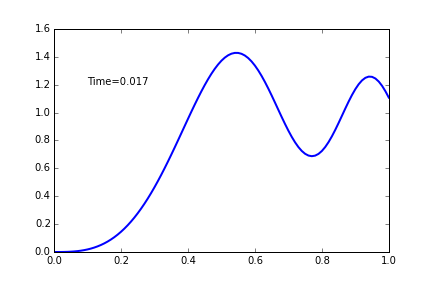
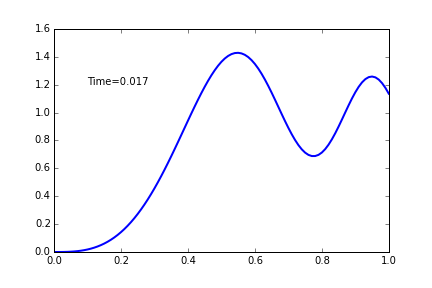
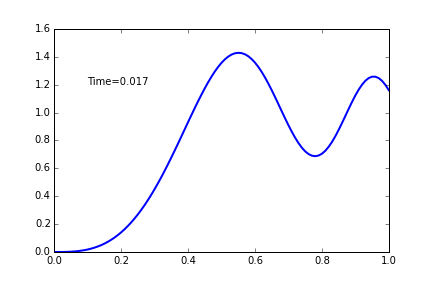
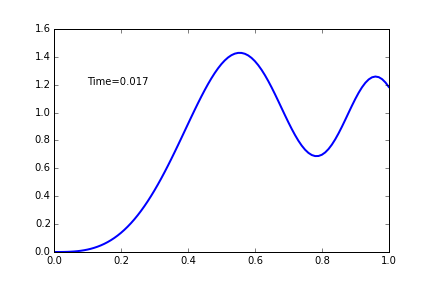
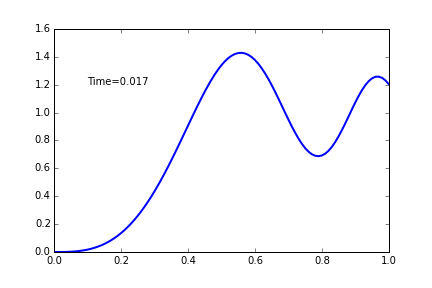
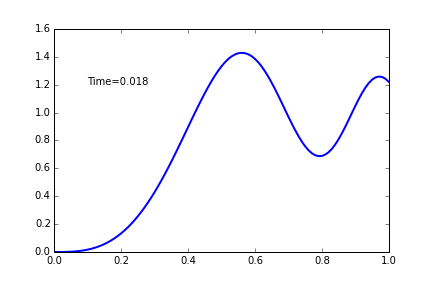
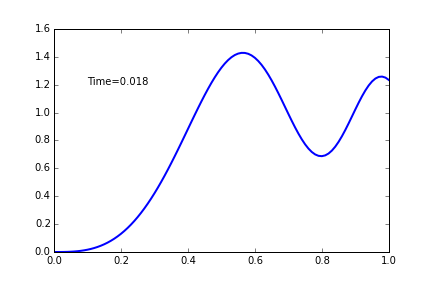
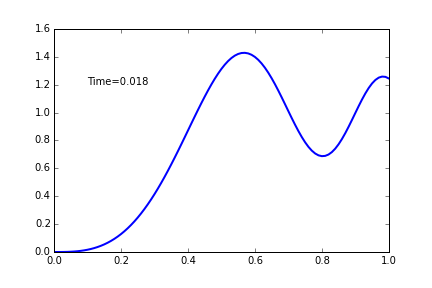
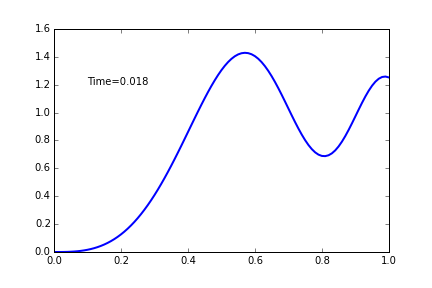
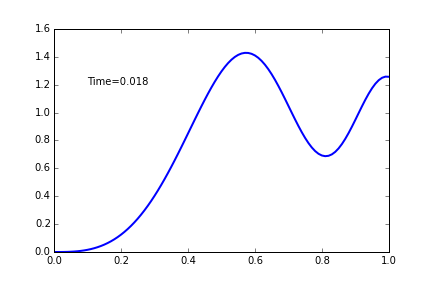
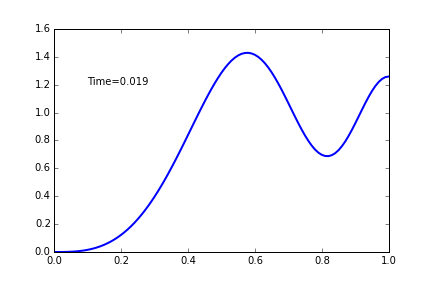
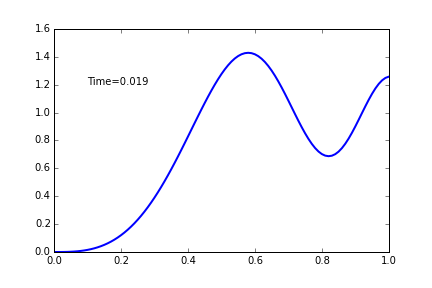
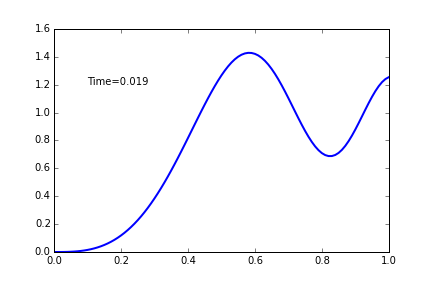
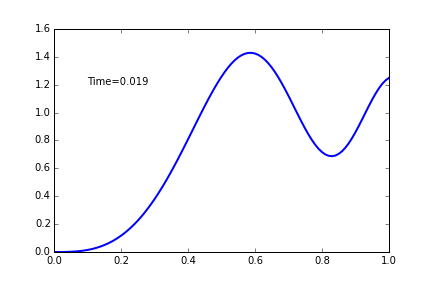
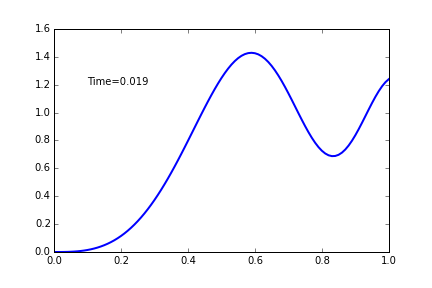
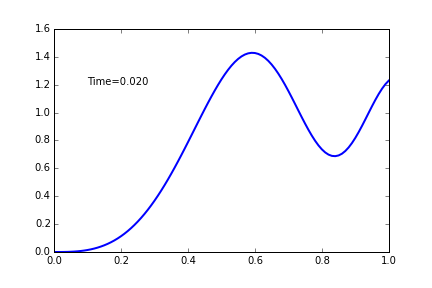
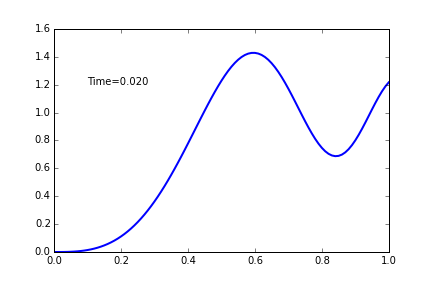
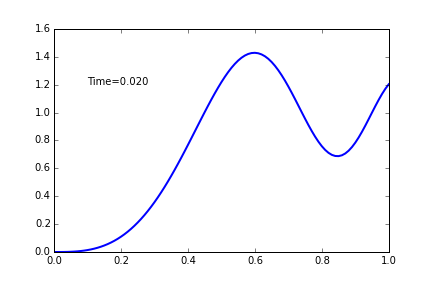

In [16]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax2 = fig.add_subplot(111,xlim=(0,1), ylim=(0, 1.6))
line, = ax2.plot([], [], lw=2)
time_text = ax2.text(0.1,1.2,'')
tf=0.02

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line,

def animate(i):
    tt=float(i+1)*tf/100.
    time_text.set_text('Time=%4.3f' %tt)
    line.set_data(x, kappa(x,i*tf/100.)/k0)
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=20, blit=True)

Note
---

Here, parameters the demo were taken from Barilla no. 1 with $r_1􏰆= 0.57$ mm and $􏰁\gamma_1=0.521 m^2/s$; 
Other cases for Barilla are:

- no. 5 $r_5􏰆= 0.84$ mm and $􏰁\gamma_5=0.735 m^2/s$ 
- no. 7 $r_7= 0.95$ mm and $􏰁\gamma_7=0.82 m^2/s$

and initial curvatures (in the range $9.7–15.3 m^{-1}$), with $L$ around 24 cm.

Pratice Exercises
---

- Take another sample of Spaghetti to run the similar simulation as above;
- Try to make a video record for experiment why Spaghetti does not break in half.

In [223]:
%%bash

ipython nbconvert --to html Spaghetti.ipynb

[NbConvertApp] Converting notebook Spaghetti.ipynb to html
[NbConvertApp] Writing 2762135 bytes to Spaghetti.html
